In [ ]:
#Stwórz model klasyfikujący dla Brain Tumor Data Set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
EPOCHS = 100

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "brain_tumor_ds/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)
# on ma nam przeskalowac zdj od 0-1 i podzielić na biór walidacyjny i treningowy

# Load Data
train_dataset = gen.flow_from_directory(
    root_path, 
    class_mode="categorical",
    classes=["tumor","healthy"],
    shuffle=True,
    batch_size=32,
    target_size=(100,100),
    subset="training",
    color_mode = "grayscale")


validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["tumor","healthy"],
    shuffle=True,
    batch_size=32,
    target_size=(100,100),
    subset="validation",
    color_mode = "grayscale")

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [4]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv2D(filters = 10, kernel_size = (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters = 6, kernel_size = (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 6)         546       
                                                                 
 flatten (Flatten)           (None, 13254)             0         
                                                                 
 dense (Dense)               (None, 128)               1696640   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

In [5]:
history = model.fit(train_dataset, epochs = EPOCHS, validation_data=(validation_dataset), callbacks = [es])

Epoch 1/100
116/116 [==============================] - 21s 174ms/step - loss: 0.5060 - accuracy: 0.7512 - val_loss: 0.4492 - val_accuracy: 0.7954
Epoch 2/100
116/116 [==============================] - 18s 154ms/step - loss: 0.3874 - accuracy: 0.8337 - val_loss: 0.3221 - val_accuracy: 0.8607
Epoch 3/100
116/116 [==============================] - 18s 153ms/step - loss: 0.3216 - accuracy: 0.8571 - val_loss: 0.3408 - val_accuracy: 0.8346
Epoch 4/100
116/116 [==============================] - 18s 154ms/step - loss: 0.2707 - accuracy: 0.8878 - val_loss: 0.2370 - val_accuracy: 0.9064
Epoch 5/100
116/116 [==============================] - 18s 153ms/step - loss: 0.2409 - accuracy: 0.9008 - val_loss: 0.1802 - val_accuracy: 0.9358
Epoch 6/100
116/116 [==============================] - 18s 151ms/step - loss: 0.2041 - accuracy: 0.9207 - val_loss: 0.1452 - val_accuracy: 0.9456
Epoch 7/100
116/116 [==============================] - 18s 152ms/step - loss: 0.1782 - accuracy: 0.9356 - val_loss: 0.1387 -

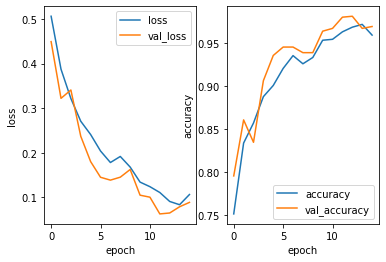

In [6]:
#wyświetl wykresy uczenia
hist = pd.DataFrame(history.history)

plt.subplot(1, 2, 1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [7]:
img, label = validation_dataset.next()
y_pred = model.predict(img)

1/1 [==============================] - 0s 91ms/step


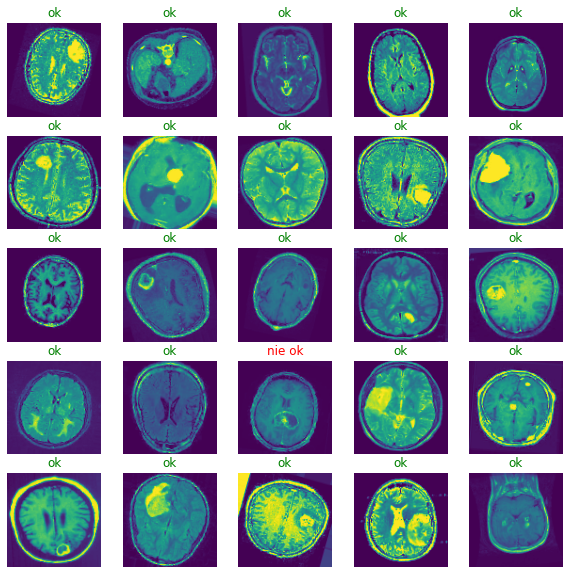

In [8]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')    

In [9]:
# nie nazywałbym tego detekcją nowotworów, ale wykrywaniem anomalii ok- lekarz nie może na tym polegać